<a href="https://colab.research.google.com/github/RoAlro/InmersionDeDatos1-ALURA/blob/main/Inmersion_de_datos_Desafio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Desafío**


1. Promedio de área de todos los inmuebles en los barrios en el dataset. Realizar un gráfico con el promedio de las áreas de los inmuebles de los barrios (El top 10).

Promedio de área de todos los inmuebles del dataset, por un lado (mostrar los 10 barrios con mayor promedio de área) ¿Por qué será que Modelia presenta esa diferencia tan grande de área con respecto a los demás barrios?

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

inmuebles = pd.read_csv('/content/drive/MyDrive/DATASCIENCE/Inmersión de datos/inmuebles_bogota.csv') 
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [120]:
inmuebles.shape

(9520, 8)

In [121]:
inmuebles.columns

Index(['Tipo', 'Descripcion', 'Habitaciones', 'Banos', 'Area', 'Barrio', 'UPZ',
       'Valor'],
      dtype='object')

In [122]:
#Renombrabdo Columnas---
#-------------------------------------------------------
columnas = {'Baños':'Banos','Área':'Area'}
inmuebles = inmuebles.rename(columns=columnas)
inmuebles.sort_values('Area',ascending=False).head(10)


,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
7073,Casa,Casa en venta en Modelia,4,3,166243,Modelia,Fontibón,8.500000e+08
6388,Apartamento,Apartamento en venta en Chapinero,3,5,15920,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,1.250000e+09
3807,Apartamento,Apartamento en venta en Chapinero,3,5,15920,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,1.250000e+09
4697,Finca,Finca en venta en Barrios Unidos,6,6,8884,Barrios Unidos,Los Andes,1.000000e+09
2279,Finca,Finca en venta en Barrios Unidos,6,6,8884,Barrios Unidos,Los Andes,1.000000e+09
9026,Casa,Casa en venta en Usaquén,3,4,6364,Usaquén,Usaquén,3.000000e+09
1860,Apartamento,Apartamento en venta en Barrios Unidos,3,2,6267,Barrios Unidos,Los Andes,1.430000e+08
1037,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,5458,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,1.780000e+08
7891,Apartamento,Apartamento en venta en Engativa,2,1,4600,Engativa,Engativá,1.550000e+08
7452,Apartamento,Apartamento en venta en Engativa,2,1,4600,Engativa,Engativá,1.550000e+08


Depurando el dataset: Convirtiendo todos los elementos de la columna valor en números, borrando el símbolo $

In [123]:
####Depurando ........
inmuebles['Valor'] = inmuebles['Valor'].replace({'\$ ': '', '\.': ''}, regex=True).astype(float)

inmuebles.sort_values('Valor',ascending=False).head(10)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
5234,Edificio,Edificio en venta en Usaquén,12,7,1664,Usaquén,Usaquén,1.600000e+10
1783,Apartamento,Apartamento en venta en El Chicó,3,5,1550,El Chicó,CHAPINERO: Chicó Lago + El Refugio,1.320000e+10
8498,Apartamento,Apartamento en venta en La Candelaria,3,3,443,La Candelaria,La Candelaria,1.045150e+10
8693,Apartamento,Apartamento en venta en La Candelaria,3,3,443,La Candelaria,La Candelaria,1.045150e+10
2910,Edificio,Edificio en venta en Santa Barbara,22,0,1080,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,9.200000e+09
1103,Casa,Casa en venta en Santa Ana,4,6,674,Santa Ana,Usaquén,8.800000e+09
1301,Apartamento,Apartamento en venta en Chapinero,3,5,476,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,8.550000e+09
4985,Apartamento,Apartamento en venta en Los Rosales,3,5,381,Los Rosales,CHAPINERO: Chicó Lago + El Refugio,8.358000e+09
5718,Apartamento,Apartamento en venta en Usaquén,4,6,540,Usaquén,Usaquén,7.500000e+09
5729,Apartamento,Apartamento en venta en Zona Noroccidental,4,7,550,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,7.200000e+09


In [124]:
#Visualizando los nombres de todos los barrios sin repetir//
Nombr_Barrios = inmuebles['Barrio'].unique()
Nombr_Barrios

array(['Zona Noroccidental', 'Castilla', 'Chico Reservado', 'Usaquén',
       'Bella Suiza', 'El Chicó', 'Tintala', 'Marly', 'Kennedy',
       'Nicolas De Federman', 'La Calleja', 'Mazuren', 'Suba',
       'Barrios Unidos', 'Engativa', 'Fontibón', 'Villa Alsacia',
       'Palermo', 'La Candelaria', 'El Contador', 'El Batán',
       'Santa Barbara', 'Mirandela ', 'Cedritos', 'Colina Campestre',
       'Hayuelos', 'Ciudad Salitre', 'Quinta Paredes',
       'Candelaria La Nueva', 'Chico Norte', 'Normandia',
       'Ciudad Bolívar', 'Bosa', 'Rafael Uribe Uribe', 'Las Villas',
       'Modelia', 'San Patricio', 'Barrancas', 'Teusaquillo',
       'Puente Aranda', 'Chapinero', 'Usme', 'Nueva Zelandia', 'Madelena',
       'El Plan', 'Santa Paula', 'Villemar', 'Santa Fe', 'Antonio Nariño',
       'La Uribe', 'Los Rosales', 'Chapinero Central', 'Los Mártires',
       'Bogotá D.C', 'San Cristobal', 'Boyaca ', 'Timiza', 'Gran America',
       'Costa Azul', 'Gran Granada', 'La Salle', 'Portales Del 

In [125]:
#Visualizando la cantidad de barrios en el dataset
len(Nombr_Barrios)

149

Encontrando el promedio de área de todos los inmuebles en los barrios en el dataset.

In [126]:
###Agrupando por promedio de área
inmuebles_area=inmuebles.groupby(by=["Barrio"]).Area.mean()
inmuebles_area.sort_values(ascending=False).head(10)

Barrio
Modelia                  4316.750000
Libertador                642.000000
Bosa Piamonte             400.000000
La Soledad                378.625000
Restrepo                  336.500000
Santa Librada             328.000000
Las Ferias                320.000000
Santa Ana                 309.375000
Veraguas                  302.666667
Bellavista Occidental     286.200000
Name: Area, dtype: float64

In [146]:
###Agrupando por promedio de Valor
inmuebles_valor=inmuebles.groupby(by=["Barrio"]).Valor.mean()
inmuebles_valor.sort_values(ascending=False).head(10)

Barrio
Santa Ana          3.172500e+09
La Candelaria      1.544228e+09
El Retiro          1.528421e+09
Los Rosales        1.479647e+09
Quinta Camacho     1.449216e+09
El Chicó           1.393411e+09
Cerros De Suba     1.315000e+09
Chico Navarra      1.292083e+09
El Refugio         1.231625e+09
Chico Reservado    1.157213e+09
Name: Valor, dtype: float64

Graficando las áreas promedio de cada barrio en orden descendente

<Axes: xlabel='Barrio'>

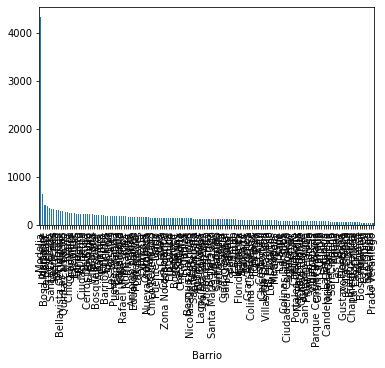

In [128]:
inmuebles_area.sort_values(ascending=False).plot.bar()

Graficando las 10 mayores áreas promedio con respecto a los barrios


<Axes: xlabel='Barrio'>

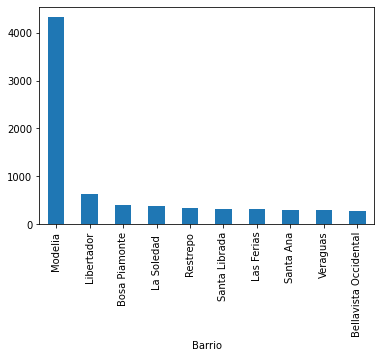

In [129]:
inmuebles_area.sort_values(ascending=False).head(10).plot.bar()

In [147]:
#Visualizando la cantidad de propiedades por barrio que sean menores a la cantidad
# de propiedades en el barrio Modelia
inmuebles_cant=inmuebles.value_counts("Barrio")
inmuebles_cant[(inmuebles_cant<=inmuebles_cant['Modelia'] )].head(15)

Barrio
Colina Campestre       40
Modelia                40
San Cristobal          38
Los Mártires           38
Las Nieves             37
Nicolas De Federman    37
Villa Alsacia          35
Chapinero Alto         35
La Candelaria          32
El Plan                31
Castilla               30
Puente Largo           30
Tunjuelito             29
Hayuelos               28
Madelena               28
dtype: int64

In [148]:
#Visualizando la cantidad de propiedades por barrio que sean mayores a la cantidad
# de propiedades en el barrio Modelia
inmuebles_cant=inmuebles.value_counts("Barrio")
inmuebles_cant[(inmuebles_cant >=inmuebles_cant['Modelia'] )].head(15)

Barrio
Usaquén               1105
Zona Noroccidental     877
Kennedy                589
Bosa                   589
Cedritos               554
Barrios Unidos         473
Engativa               462
Suba                   443
Santa Barbara          438
Chapinero              332
Fontibón               270
Chico Reservado        225
Teusaquillo            180
El Batán               133
Puente Aranda          116
dtype: int64

In [145]:
#Barrios con mayor Área total acumulada
inmuebles.groupby("Barrio").Area.sum().sort_values(ascending=False).head(15)

Barrio
Modelia               172670
Usaquén               148121
Zona Noroccidental    119084
Barrios Unidos         87799
Chapinero              81248
Suba                   61615
Kennedy                61475
Engativa               59808
Santa Barbara          54693
Cedritos               53711
Bosa                   34879
Chico Reservado        32127
Teusaquillo            31057
Fontibón               25383
Puente Aranda          20759
Name: Area, dtype: int64

De lo visto hasta ahora Esto se debe a que Modelia es el barrio que mas Área total posee y uno de los barrios que menos inmuebles tiene; y al estar hablando de área promedio se obtiene por cálculo la diferencia que tan grande que hay con los otros barrios. Por ejemplo el barrio "Chico Reservado" es uno de los 15 barrios con mayor área total y con mayor cantidad de propiedades; de esta forma al sacar el promedio se obtiene un resultado mucho menor al promedio que se obtiene por Modelia. En general todos los barrios tienen una cantidad equilibrada entre área total y propiedaes; sin embargo este no es el caso de Modelia y esa es la razón de la diferencia tan grande con respecto a los otros barrios.

**Desafío**



2. Consultar otros datos estadísticos, conteo, mediana, valores mínimo y máximo.

Usando la función describe para obtener los datos estadísticos de las columnas que tengan valores numéricos


In [88]:
inmuebles.describe()

,Habitaciones,Banos,Area,Valor
count,9520.000000,9520.000000,9520.000000,9.520000e+03
mean,3.072479,2.447899,146.664706,6.020624e+08
std,2.049856,1.255314,1731.379622,7.046021e+08
min,1.000000,0.000000,2.000000,6.000000e+07
25%,2.000000,2.000000,57.000000,2.500000e+08
50%,3.000000,2.000000,80.000000,4.091825e+08
75%,3.000000,3.000000,135.000000,6.800000e+08
max,110.000000,9.000000,166243.000000,1.600000e+10


Obteniendo los datos estadísticos agrupando por Barrio y por los valores estadísticos referidos al Área. Ordenados de manera Descendente.

In [95]:
Datos_Est_Barr_Area = inmuebles.groupby('Barrio')['Area'].agg(['count','mean','median','max','min'])
Datos_Est_Barr_Area.sort_values('mean',ascending=False).head(10)

,count,mean,median,max,min
Barrio,,,,,
Modelia,40,4316.750000,155.5,166243,48
Libertador,4,642.000000,642.0,984,300
Bosa Piamonte,2,400.000000,400.0,400,400
La Soledad,8,378.625000,229.0,1350,92
Restrepo,10,336.500000,365.0,600,48
Santa Librada,2,328.000000,328.0,340,316
Las Ferias,2,320.000000,320.0,320,320
Santa Ana,8,309.375000,245.0,674,108
Veraguas,6,302.666667,162.0,1200,59


Obteniendo datos estadísticos globales para la columna Área

In [96]:
inmuebles.Area.median()

80.0

In [97]:
inmuebles.Area.max()

166243

In [98]:
inmuebles.Area.min()

2

In [99]:
inmuebles.Area.mean()

146.66470588235293

In [100]:
inmuebles.Area.count()

9520